In [16]:
# Dependencies
import json
import requests
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import operator
from pprint import pprint
import random
import scipy
import scipy.stats
from scipy.stats import linregress, sem, ttest_ind
from spread import variance, standard_deviation, zipped_z_scores
from stats import mean, median, mode, multi_mode

In [17]:
# Original Dataframe used for Revenue, Budget information
path = "tmdb-5000-movie-dataset/moviesapi_clean.csv"
df = pd.read_csv(path)
df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,6.6,284139100,260000000


In [18]:
df["Rated"].unique()

array(['PG-13', 'PG', 'G', 'Not Rated', 'R', 'TV-14', 'Unrated', 'Passed',
       'NC-17', nan, 'Approved', 'APPROVED', 'GP', 'M', 'NOT RATED',
       'UNRATED', 'TV-G', 'TV-PG', 'TV-MA', 'PASSED', 'M/PG', 'X'],
      dtype=object)

In [19]:
#Remove duplicate rated values

df.dropna(how='any')
df=df.replace({"Not Rated": "Unrated", "nan": "Unrated", "APPROVED": "Approved", "NOT RATED": "Unrated", "UNRATED": "Unrated", "PASSED": "Passed"})
df
rated_unique_values=df["Rated"].unique()

In [20]:
# Movie release dates are between 1916 and 2017

df['Year'].sort_values(ascending= False).head(5)

4297    2019
4228    2018
4559    2018
4564    2018
4391    2018
Name: Year, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582 entries, 0 to 4581
Data columns (total 12 columns):
Title          4582 non-null object
Year           4582 non-null int64
Rated          4497 non-null object
Runtime        4582 non-null object
Genre          4582 non-null object
Director       4576 non-null object
Writer         4538 non-null object
Language       4575 non-null object
Country        4582 non-null object
IMDB Rating    4582 non-null float64
Revenue        4582 non-null int64
Budget         4582 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 429.6+ KB


In [22]:
#List of 5 random directors and the number of movies they directed

random_directors=[]
movies_directed=[]
for i in range(0,5):
    random_directors.append(random.choice(df["Director"]))
print(random_directors)
for director in random_directors:
    movies_directed.append(len(df[df['Director'] == director]))
print(movies_directed)

['Michael Cuesta', 'Judd Apatow', 'George A. Romero', 'Chris Koch', 'Richard Linklater']
[2, 4, 6, 2, 11]


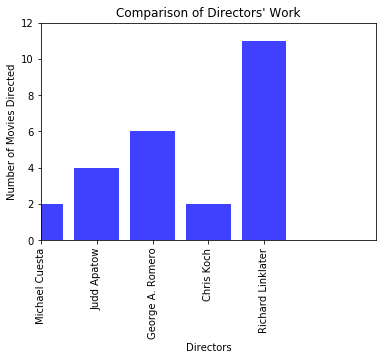

<Figure size 432x288 with 0 Axes>

In [23]:
#Directors' movies bar chart using list of random directors

x_axis = np.arange(len(movies_directed))
plt.bar(x_axis, movies_directed, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, random_directors, rotation=90)
plt.xlim(0, len(x_axis)+1)
plt.ylim(0, max(movies_directed)+1)
plt.title("Comparison of Directors' Work")
plt.xlabel("Directors")
plt.ylabel("Number of Movies Directed")
plt.savefig("Graphs/DirectorBarChart.png")
plt.show()
plt.tight_layout()

In [24]:
#do .loc by genre and then create genre_groups=merged_df[["Genre", "Rated"]]. do rated_groups=genre_groups.groupby("Rated")

genre_groups=df.groupby(['Genre','Rated'])
counted_up=genre_groups.count()
counted_up.head()

Title  Year  Runtime  Director  Writer  Language  \
Genre             Rated                                                     
Action            PG-13      1     1        1         1       1         1   
                  R          4     4        4         4       4         4   
Action, Adventure PG         2     2        2         2       2         2   
                  PG-13     10    10       10        10      10        10   
                  R          3     3        3         3       3         3   

                         Country  IMDB Rating  Revenue  Budget  
Genre             Rated                                         
Action            PG-13        1            1        1       1  
                  R            4            4        4       4  
Action, Adventure PG           2            2        2       2  
                  PG-13       10           10       10      10  
                  R            3            3        3       3

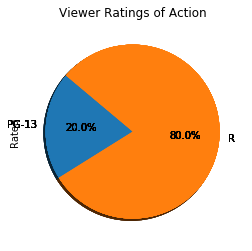

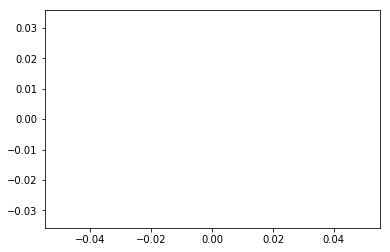

In [25]:
# Pie chart showing viewer rated movies of a specific genre

genre_id="Action"
one_genre=counted_up.loc[genre_id]
rated_list=one_genre.keys()
genre_pie=one_genre.plot(kind="pie",y=rated_list,title=("Viewer Ratings of "+genre_id), autopct="%1.1f%%", shadow=True, startangle=140, legend=None)
genre_pie.set_ylabel("Rated")
plt.show()
plt.tight_layout()
plt.axis("equal")
plt.savefig("Graphs/GenreRatedPie.png")

#plt.legend(loc="upper right")

In [26]:
# Mean, median mode of revenue and budgets

budget_data= df["Budget"]
revenue_data=df["Revenue"]

print(f"Mean Budget: {mean(budget_data)}")
print(f"Median Budget: {budget_data.median()}")
print(f"Mode Budget: {mode(budget_data)}")
print(f"Mean Revenue: {mean(revenue_data)}")
print(f"Median Revenue: {revenue_data.median()}")
print(f"Mode Revenue: {mode(revenue_data)}")

Mean Budget: 29620515.951767787
Median Budget: 15000000.0
Mode Budget: (0, 954)
Mean Revenue: 84385511.87690964
Median Revenue: 20308986.5
Mode Revenue: (0, 1324)


0       1.793644
1       1.964268
2       1.815310
3       1.828852
4       1.855935
5       1.850518
6       1.855935
7       1.910101
8       1.828852
9       1.828852
10      1.883018
11      1.693436
12      1.693436
13      1.842394
14      1.761144
15      1.761144
16      1.747602
17      2.180933
18      1.761144
19      1.828852
20      1.734061
21      1.693436
22      1.828852
23      1.639270
24      1.712394
25      1.693436
26      1.828852
27      1.717811
28      1.558020
29      1.693436
          ...   
4552    1.151773
4553    1.151858
4554    1.151846
4555    1.151846
4556    1.151773
4557    1.151773
4558    1.151773
4559    1.151773
4560    1.151773
4561    1.151773
4562    1.151833
4563    1.151773
4564    1.151773
4565    1.151773
4566    1.151773
4567    1.151773
4568    1.151773
4569    1.151806
4570    1.151773
4571    1.151773
4572    1.151773
4573    1.151827
4574    1.151773
4575    1.151792
4576    1.151773
4577    1.152369
4578    1.151797
4579    1.1517

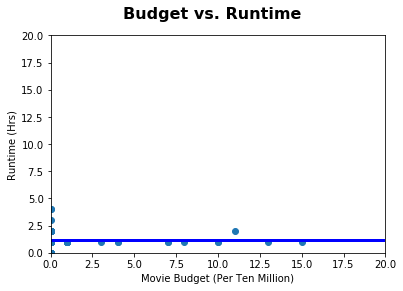

<Figure size 432x288 with 0 Axes>

In [27]:
# Budget vs Runtime data

list_runtime=[]
runtime_hrs=[]
budget_tenmils=[]

for list_item in df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
for list_item in list_runtime:
    list_item= round(list_item/60,2)
    runtime_hrs.append(int(list_item))

#for budget_item in df["Budget"]:
    #budget_item= round(budget_item/10000000, 2)
    #budget_tenmils.append(int(budget_item))
    
x_axis = df["Budget"]
y_axis = runtime_hrs
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(fit)
fig, ax = plt.subplots()

fig.suptitle("Budget vs. Runtime", fontsize=16, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel("Movie Budget (Per Ten Million)")
ax.set_ylabel("Runtime (Hrs)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()
plt.savefig("Graphs/LinRegressBudget.png")

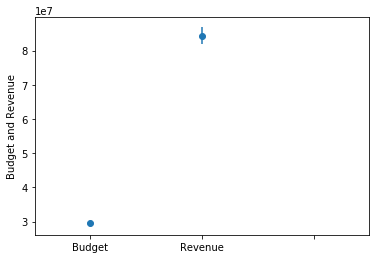

<Figure size 432x288 with 0 Axes>

In [28]:
#Budget and Revenue t-test

budget_data = df["Budget"]
budget_means = np.mean(budget_data)
budget_sem = sem(budget_data)

revenue_data = df["Revenue"]
revenue_means = np.mean(revenue_data)
revenue_sem = sem(revenue_data)

means = [budget_means, revenue_means]
sems = [budget_sem, revenue_sem]
labels = ["Budget", "Revenue"]

fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2])

ax.set_ylabel("Budget and Revenue")

plt.show()
plt.savefig("Graphs/ttest.png")

In [29]:
(t_stat, p) = ttest_ind(budget_data, revenue_data, equal_var=False)

if p < 0.05:
    print("The difference between budget and revenue is significant.")
else:
    print("The difference between budget and revenue is due to chance.")

print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

The difference between budget and revenue is significant.
t-statistics is -21.807501844668373.
p-value is 6.448488197170402e-101.


0       3.028912
1       1.814631
2       1.761243
3       1.897006
4       1.364760
5       1.768021
6       1.569241
7       2.110001
8       1.796658
9       1.756315
10      1.435838
11      1.565450
12      1.884192
13      1.235254
14      1.616465
15      1.454827
16      2.185873
17      1.870935
18      1.590664
19      1.811321
20      1.675864
21      1.382393
22      1.812903
23      1.423312
24      1.541462
25      2.402199
26      1.942445
27      1.377312
28      2.181866
29      1.912706
          ...   
4552    1.175908
4553    1.175915
4554    1.178003
4555    1.175908
4556    1.175960
4557    1.175908
4558    1.175908
4559    1.175908
4560    1.175908
4561    1.175908
4562    1.175908
4563    1.175908
4564    1.175908
4565    1.175908
4566    1.175908
4567    1.175908
4568    1.175908
4569    1.179896
4570    1.175908
4571    1.175908
4572    1.175908
4573    1.175974
4574    1.175908
4575    1.176191
4576    1.175908
4577    1.177265
4578    1.175908
4579    1.1759

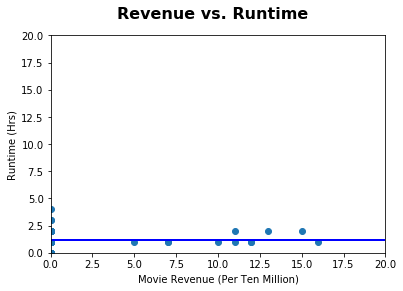

<Figure size 432x288 with 0 Axes>

In [30]:
# Revenue vs Runtime data

list_runtime=[]
runtime_hrs=[]

for list_item in df['Runtime']:
    list_item=list_item.strip(' min')
    list_runtime.append(int(list_item))
    
for list_item in list_runtime:
    list_item= round(list_item/60,2)
    runtime_hrs.append(int(list_item))

    
x_axis = df["Revenue"]
y_axis = runtime_hrs
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(fit)
fig, ax = plt.subplots()

fig.suptitle("Revenue vs. Runtime", fontsize=16, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.set_xlabel("Movie Revenue (Per Ten Million)")
ax.set_ylabel("Runtime (Hrs)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()
plt.savefig("Graphs/LinRegressRevenue.png")